# import modules

In [ ]:
conda install psycopg2

2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import os

# Set up plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# Load pickled data files
pickled_path = "./resources/pickled_tables/"

# Load engine and engine_manufacturer data
with open(os.path.join(pickled_path, "engine.plk"), "rb") as f:
    engine_df = pickle.load(f)

with open(os.path.join(pickled_path, "engine_manufacturer.plk"), "rb") as f:
    engine_manufacturer_df = pickle.load(f)

# Load related tables for comprehensive analysis
with open(os.path.join(pickled_path, "season_engine_manufacturer.plk"), "rb") as f:
    season_engine_manufacturer_df = pickle.load(f)

with open(os.path.join(pickled_path, "season_entrant_engine.plk"), "rb") as f:
    season_entrant_engine_df = pickle.load(f)

with open(os.path.join(pickled_path, "race.plk"), "rb") as f:
    race_df = pickle.load(f)

with open(os.path.join(pickled_path, "season.plk"), "rb") as f:
    season_df = pickle.load(f)

print(f"Engine Data Shape: {engine_df.shape}")
print(f"Engine Manufacturer Data Shape: {engine_manufacturer_df.shape}")
print(f"Season Engine Manufacturer Data Shape: {season_engine_manufacturer_df.shape}")
print(f"Season Entrant Engine Data Shape: {season_entrant_engine_df.shape}")


Engine Data Shape: (419, 7)
Engine Manufacturer Data Shape: (76, 17)
Season Engine Manufacturer Data Shape: (555, 15)
Season Entrant Engine Data Shape: (2016, 5)


# Display engine manufacturer data


In [ ]:
print("Engine Manufacturer DataFrame:")
print(engine_manufacturer_df.head(10))
print("\nEngine Manufacturer Columns:", engine_manufacturer_df.columns.tolist())
print("\nData Info:")
print(engine_manufacturer_df.info())


Engine Manufacturer DataFrame:
             id          name      country_id  best_championship_position  \
0          acer          Acer          taiwan                         9.0   
1    alfa-romeo    Alfa Romeo           italy                         3.0   
2          alta          Alta  united-kingdom                         NaN   
3        arrows        Arrows  united-kingdom                         7.0   
4      asiatech      Asiatech          france                         9.0   
5  aston-martin  Aston Martin  united-kingdom                         NaN   
6           ats           ATS           italy                         NaN   
7           bmw           BMW         germany                         2.0   
8      borgward      Borgward         germany                         NaN   
9           bpm           BPM           italy                         NaN   

   best_starting_grid_position  best_race_result  total_championship_wins  \
0                          4.0              

# Sort by wins and display top performers


In [4]:
# Sort by wins and display top performers
top_engines = engine_manufacturer_df.nlargest(15, 'total_race_wins')[
    ['id', 'name', 'country_id', 'total_race_entries', 'total_race_wins', 
     'total_podiums', 'total_pole_positions', 'total_fastest_laps']
].reset_index(drop=True)

print("Top 15 Engine Manufacturers by Wins:")
print(top_engines)


Top 15 Engine Manufacturers by Wins:
             id         name                country_id  total_race_entries  \
0       ferrari      Ferrari                     italy                1120   
1      mercedes     Mercedes                   germany                 607   
2          ford         Ford  united-states-of-america                 528   
3       renault      Renault                    france                 768   
4         honda        Honda                     japan                 482   
5        climax       Climax            united-kingdom                  98   
6    honda-rbpt   Honda RBPT                     japan                  64   
7           tag          TAG                luxembourg                  68   
8           bmw          BMW                   germany                 273   
9           brm          BRM            united-kingdom                 200   
10         rbpt         RBPT                     japan                  22   
11   alfa-romeo   Alfa Rome

# Create subplot visualizations


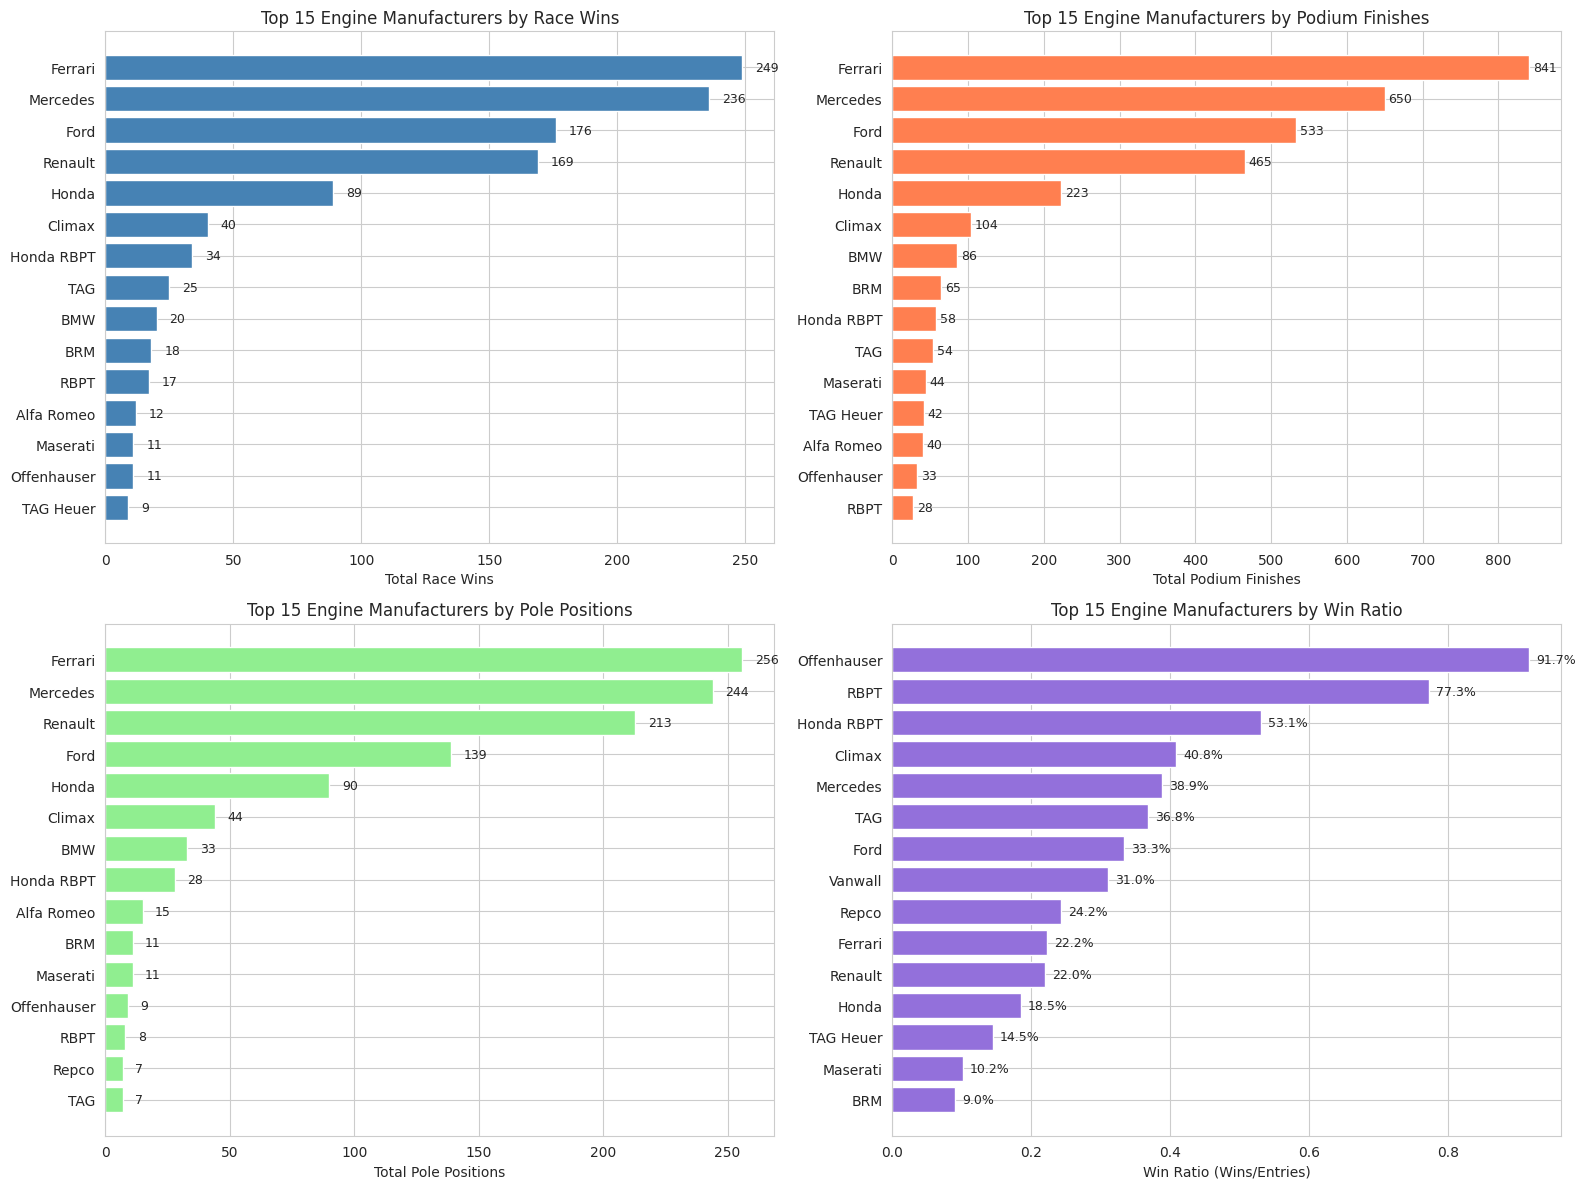

Engine manufacturer summary visualization saved!


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

top_15_wins = engine_manufacturer_df.nlargest(15, 'total_race_wins')
axes[0, 0].barh(top_15_wins['name'], top_15_wins['total_race_wins'], color='steelblue')
axes[0, 0].set_xlabel('Total Race Wins')
axes[0, 0].set_title('Top 15 Engine Manufacturers by Race Wins')
axes[0, 0].invert_yaxis()
for i, wins in enumerate(top_15_wins['total_race_wins']):
    axes[0, 0].text(wins + 5, i, f'{int(wins):,}', va='center', fontsize=9)

top_15_podiums = engine_manufacturer_df.nlargest(15, 'total_podiums')
axes[0, 1].barh(top_15_podiums['name'], top_15_podiums['total_podiums'], color='coral')
axes[0, 1].set_xlabel('Total Podium Finishes')
axes[0, 1].set_title('Top 15 Engine Manufacturers by Podium Finishes')
axes[0, 1].invert_yaxis()
for i, podiums in enumerate(top_15_podiums['total_podiums']):
    axes[0, 1].text(podiums + 5, i, f'{int(podiums):,}', va='center', fontsize=9)

top_15_poles = engine_manufacturer_df.nlargest(15, 'total_pole_positions')
axes[1, 0].barh(top_15_poles['name'], top_15_poles['total_pole_positions'], color='lightgreen')
axes[1, 0].set_xlabel('Total Pole Positions')
axes[1, 0].set_title('Top 15 Engine Manufacturers by Pole Positions')
axes[1, 0].invert_yaxis()
for i, poles in enumerate(top_15_poles['total_pole_positions']):
    axes[1, 0].text(poles + 5, i, f'{int(poles):,}', va='center', fontsize=9)

engine_manufacturer_df['win_ratio'] = (engine_manufacturer_df['total_race_wins'] / 
                                       engine_manufacturer_df['total_race_entries']).fillna(0)
top_15_ratio = engine_manufacturer_df.nlargest(15, 'win_ratio')
axes[1, 1].barh(top_15_ratio['name'], top_15_ratio['win_ratio'], color='mediumpurple')
axes[1, 1].set_xlabel('Win Ratio (Wins/Entries)')
axes[1, 1].set_title('Top 15 Engine Manufacturers by Win Ratio')
axes[1, 1].invert_yaxis()
for i, ratio in enumerate(top_15_ratio['win_ratio']):
    axes[1, 1].text(ratio + 0.01, i, f'{ratio:.1%}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('engine_manufacturers_summary.png', dpi=300, bbox_inches='tight')
plt.show()
print("Engine manufacturer summary visualization saved!")

# Calculate efficiency metrics


In [6]:
# Calculate efficiency metrics
engine_stats = engine_manufacturer_df[
    ['name', 'total_race_entries', 'total_race_wins', 'total_podiums', 
     'total_pole_positions', 'total_fastest_laps']
].copy()

# Calculate ratios
engine_stats['podium_ratio'] = (engine_manufacturer_df['total_podiums'] / 
                               engine_manufacturer_df['total_race_entries']).round(3)
engine_stats['win_ratio'] = (engine_manufacturer_df['total_race_wins'] / 
                            engine_manufacturer_df['total_race_entries']).round(3)
engine_stats['pole_ratio'] = (engine_manufacturer_df['total_pole_positions'] / 
                             engine_manufacturer_df['total_race_entries']).round(3)
engine_stats['fastest_lap_ratio'] = (engine_manufacturer_df['total_fastest_laps'] / 
                                    engine_manufacturer_df['total_race_entries']).round(3)

# Sort by podium ratio and display top performers
top_performers = engine_stats.sort_values('podium_ratio', ascending=False).head(15)
print("\nTop 15 Engine Manufacturers by Efficiency (Podium Ratio):")
print(top_performers.to_string())



Top 15 Engine Manufacturers by Efficiency (Podium Ratio):
           name  total_race_entries  total_race_wins  total_podiums  total_pole_positions  total_fastest_laps  podium_ratio  win_ratio  pole_ratio  fastest_lap_ratio
48  Offenhauser                  12               11             33                     9                  10         2.750      0.917       0.750              0.833
57         RBPT                  22               17             28                     8                   8         1.273      0.773       0.364              0.364
43     Mercedes                 607              236            650                   244                 236         1.071      0.389       0.402              0.389
16       Climax                  98               40            104                    44                  45         1.061      0.408       0.449              0.459
25         Ford                 528              176            533                   139                 162  

In [13]:
print(season_df.columns.tolist())
print(season_df.head())


['year']
   year
0  1950
1  1951
2  1952
3  1953
4  1954


# Generate comprehensive summary


In [23]:
# Generate comprehensive summary
summary_stats = engine_manufacturer_df[
    ['total_race_entries', 'total_race_wins', 'total_podiums', 
     'total_pole_positions', 'total_fastest_laps']
].describe()

print("\nSummary Statistics for Engine Manufacturers:")
print(summary_stats.round(2))

# Key insights
print("\n=== KEY INSIGHTS ===")
print(f"Total Manufacturers: {len(engine_manufacturer_df)}")
print(f"Total Race Entries: {engine_manufacturer_df['total_race_entries'].sum()}")
print(f"Total Races Won: {engine_manufacturer_df['total_race_wins'].sum()}")
print(f"Total Podiums: {engine_manufacturer_df['total_podiums'].sum()}")

# Top performers
print("\nMost Successful Engine Manufacturer:")
top = engine_manufacturer_df.loc[engine_manufacturer_df['total_race_wins'].idxmax()]
print(f"  {top['name']}: {int(top['total_race_wins'])} wins")

print("\nHighest Win Ratio:")
engine_manufacturer_df['win_ratio'] = (engine_manufacturer_df['total_race_wins'] / 
                                      engine_manufacturer_df['total_race_entries'])
top_ratio = engine_manufacturer_df.loc[engine_manufacturer_df['win_ratio'].idxmax()]
print(f"  {top_ratio['name']}: {top_ratio['win_ratio']:.3f} wins per entry")



Summary Statistics for Engine Manufacturers:
       total_race_entries  total_race_wins  total_podiums  \
count               76.00            76.00          76.00   
mean                89.43            15.04          45.11   
std                183.62            48.03         144.38   
min                  1.00             0.00           0.00   
25%                  6.00             0.00           0.00   
50%                 21.00             0.00           1.00   
75%                 77.00             1.50          14.50   
max               1120.00           249.00         841.00   

       total_pole_positions  total_fastest_laps  
count                 76.00               76.00  
mean                  15.04               15.25  
std                   49.70               49.29  
min                    0.00                0.00  
25%                    0.00                0.00  
50%                    0.00                0.00  
75%                    2.25                3.25  
max 